In [1]:
import os
import env
from env import host, user, pwd
import wrangle_cluster as wc
from wrangle_cluster import get_db_url

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np

# Exploring
import scipy.stats as stats

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# default pandas decimal number display format
pd.options.display.float_format = '{:20,.2f}'.format



In [2]:
df = wc.get_zillow_data()

In [3]:
df.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,transactiondate
0,14297519,NaN,NaN,NaN,3.50,4.00,None,NaN,3.50,NaN,...,"485,713.00","1,023,282.00","2,016.00","537,569.00","11,013.72",None,NaN,"60,590,630,072,012.00",0.03,2017-01-01
1,17052889,NaN,NaN,NaN,1.00,2.00,None,NaN,1.00,NaN,...,"88,000.00","464,000.00","2,016.00","376,000.00","5,672.48",None,NaN,"61,110,010,023,006.00",0.06,2017-01-01
2,14186244,NaN,NaN,NaN,2.00,3.00,None,NaN,2.00,NaN,...,"85,289.00","564,778.00","2,016.00","479,489.00","6,488.30",None,NaN,"60,590,218,022,012.00",0.01,2017-01-01
3,12177905,NaN,NaN,NaN,3.00,4.00,None,8.00,3.00,NaN,...,"108,918.00","145,143.00","2,016.00","36,225.00","1,777.51",None,NaN,"60,373,001,001,006.00",-0.10,2017-01-01
4,12095076,1.00,NaN,NaN,3.00,4.00,None,9.00,3.00,NaN,...,"276,684.00","773,303.00","2,016.00","496,619.00","9,516.26",None,NaN,"60,374,608,001,014.00",-0.00,2017-01-01


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52441 entries, 0 to 52440
Data columns (total 60 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      52441 non-null  int64  
 1   airconditioningtypeid         13638 non-null  float64
 2   architecturalstyletypeid      70 non-null     float64
 3   basementsqft                  47 non-null     float64
 4   bathroomcnt                   52441 non-null  float64
 5   bedroomcnt                    52441 non-null  float64
 6   buildingclasstypeid           0 non-null      object 
 7   buildingqualitytypeid         33740 non-null  float64
 8   calculatedbathnbr             52304 non-null  float64
 9   decktypeid                    389 non-null    float64
 10  finishedfloor1squarefeet      4381 non-null   float64
 11  calculatedfinishedsquarefeet  52359 non-null  float64
 12  finishedsquarefeet12          52194 non-null  float64
 13  f

In [5]:
df.describe(include='all')

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,transactiondate
count,"52,441.00","13,638.00",70.00,47.00,"52,441.00","52,441.00",0,"33,740.00","52,304.00",389.00,...,"52,357.00","52,440.00","52,441.00","52,440.00","52,437.00",2079,"2,079.00","52,318.00","52,441.00",52441
unique,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,257
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,2017-06-30
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2079,NaN,NaN,NaN,810
mean,"12,999,115.87",2.44,7.10,678.98,2.30,3.30,NaN,6.26,2.30,66.00,...,"196,533.75","529,688.16","2,016.00","333,465.48","6,453.51",NaN,14.10,"60,502,401,189,819.95",0.02,NaN
std,"3,411,444.02",3.85,2.67,711.83,1.02,0.95,NaN,1.72,1.02,0.00,...,"254,340.14","751,894.55",0.00,"570,527.80","8,755.57",NaN,2.39,"1,859,036,273,451.59",0.18,NaN
min,"10,711,855.00",1.00,2.00,38.00,0.00,0.00,NaN,1.00,1.00,66.00,...,129.00,"1,000.00","2,016.00",161.00,49.18,NaN,4.00,"60,371,011,101,000.00",-4.66,NaN
25%,"11,510,217.00",1.00,7.00,263.50,2.00,3.00,NaN,5.00,2.00,66.00,...,"77,071.00","193,747.50","2,016.00","76,020.75","2,656.22",NaN,14.00,"60,374,012,032,004.25",-0.02,NaN
50%,"12,577,645.00",1.00,7.00,512.00,2.00,3.00,NaN,6.00,2.00,66.00,...,"131,811.00","373,612.00","2,016.00","218,032.00","4,647.74",NaN,15.00,"60,376,203,011,013.50",0.01,NaN
75%,"14,129,530.00",1.00,7.00,809.50,3.00,4.00,NaN,8.00,3.00,66.00,...,"226,334.00","619,301.25","2,016.00","408,606.75","7,377.50",NaN,15.00,"60,590,423,261,751.25",0.04,NaN


### Summarize your data (summary stats, info, dtypes, shape, distributions, value_counts, etc.)

In [6]:
for column in df.columns:
    print(column)
    print(df[column].value_counts())
    print('\n ------------------------- \n')

parcelid
11991059    3
11957553    2
12478591    2
12035592    2
12443331    2
           ..
11494547    1
10976762    1
12650619    1
12650850    1
12826780    1
Name: parcelid, Length: 52320, dtype: int64

 ------------------------- 

airconditioningtypeid
 1.00    11895
13.00     1568
 5.00      159
11.00       16
Name: airconditioningtypeid, dtype: int64

 ------------------------- 

architecturalstyletypeid
 7.00    62
 3.00     3
 2.00     2
21.00     2
 8.00     1
Name: architecturalstyletypeid, dtype: int64

 ------------------------- 

basementsqft
  900.00    2
  640.00    2
  100.00    2
  515.00    2
  273.00    2
  912.00    2
  314.00    1
  819.00    1
1,809.00    1
  604.00    1
  126.00    1
  588.00    1
  786.00    1
  669.00    1
  800.00    1
  396.00    1
  112.00    1
  645.00    1
  384.00    1
1,969.00    1
  252.00    1
  600.00    1
1,218.00    1
  280.00    1
  300.00    1
  224.00    1
  512.00    1
  380.00    1
  204.00    1
  200.00    1
   90.00    1
3,

 0.00    5
 0.00    5
 0.00    5
 0.00    5
 0.02    4
        ..
 0.02    1
 0.02    1
-0.03    1
 0.03    1
 0.04    1
Name: logerror, Length: 52180, dtype: int64

 ------------------------- 

transactiondate
2017-06-30    810
2017-04-28    617
2017-05-31    566
2017-07-28    546
2017-08-31    528
             ... 
2017-05-07      1
2017-05-13      1
2017-05-20      1
2017-06-11      1
2017-09-25      1
Name: transactiondate, Length: 257, dtype: int64

 ------------------------- 



In [7]:
for column in df.columns:
    print(f'{column}\n{df[column].value_counts()} \n\n ------------------------- \n')

parcelid
11991059    3
11957553    2
12478591    2
12035592    2
12443331    2
           ..
11494547    1
10976762    1
12650619    1
12650850    1
12826780    1
Name: parcelid, Length: 52320, dtype: int64 

 ------------------------- 

airconditioningtypeid
 1.00    11895
13.00     1568
 5.00      159
11.00       16
Name: airconditioningtypeid, dtype: int64 

 ------------------------- 

architecturalstyletypeid
 7.00    62
 3.00     3
 2.00     2
21.00     2
 8.00     1
Name: architecturalstyletypeid, dtype: int64 

 ------------------------- 

basementsqft
  900.00    2
  640.00    2
  100.00    2
  515.00    2
  273.00    2
  912.00    2
  314.00    1
  819.00    1
1,809.00    1
  604.00    1
  126.00    1
  588.00    1
  786.00    1
  669.00    1
  800.00    1
  396.00    1
  112.00    1
  645.00    1
  384.00    1
1,969.00    1
  252.00    1
  600.00    1
1,218.00    1
  280.00    1
  300.00    1
  224.00    1
  512.00    1
  380.00    1
  204.00    1
  200.00    1
   90.00    1

In [8]:
df.isnull().sum()

parcelid                            0
airconditioningtypeid           38803
architecturalstyletypeid        52371
basementsqft                    52394
bathroomcnt                         0
bedroomcnt                          0
buildingclasstypeid             52441
buildingqualitytypeid           18701
calculatedbathnbr                 137
decktypeid                      52052
finishedfloor1squarefeet        48060
calculatedfinishedsquarefeet       82
finishedsquarefeet12              247
finishedsquarefeet13            52441
finishedsquarefeet15            52441
finishedsquarefeet50            48060
finishedsquarefeet6             52276
fips                                0
fireplacecnt                    45198
fullbathcnt                       137
garagecarcnt                    34426
garagetotalsqft                 34426
hashottuborspa                  50926
heatingorsystemtypeid           18506
latitude                            0
longitude                           0
lotsizesquar

In [9]:
(df.isnull().sum()/df.shape[0]*100).sort_values(ascending=False)

finishedsquarefeet15                         100.00
buildingclasstypeid                          100.00
finishedsquarefeet13                         100.00
storytypeid                                   99.91
basementsqft                                  99.91
yardbuildingsqft26                            99.88
architecturalstyletypeid                      99.87
typeconstructiontypeid                        99.86
fireplaceflag                                 99.85
finishedsquarefeet6                           99.69
decktypeid                                    99.26
pooltypeid10                                  99.15
poolsizesum                                   98.35
pooltypeid2                                   97.96
hashottuborspa                                97.11
yardbuildingsqft17                            96.31
taxdelinquencyyear                            96.04
taxdelinquencyflag                            96.04
finishedfloor1squarefeet                      91.65
finishedsqua

In [10]:
# shows the number of rows that are missing and the percentage value of the missing data
null_col_df = pd.DataFrame({'num_rows_missing': df.isnull().sum(),
            'percent_rows_missing': df.isnull().sum()/df.shape[0]*100})
null_col_df

,num_rows_missing,percent_rows_missing
parcelid,0,0.00
airconditioningtypeid,38803,73.99
architecturalstyletypeid,52371,99.87
basementsqft,52394,99.91
bathroomcnt,0,0.00
bedroomcnt,0,0.00
buildingclasstypeid,52441,100.00
buildingqualitytypeid,18701,35.66
calculatedbathnbr,137,0.26
decktypeid,52052,99.26


In [11]:
def nulls_by_col(df):
    num_missing = df.isnull().sum()
    rows = df.shape[0]
    percent_missing = num_missing / rows * 100
    cols_missing = pd.DataFrame({'num_rows_missing': num_missing, 'percent_rows_missing': percent_missing})
    return cols_missing.sort_values(by='num_rows_missing', ascending=False)

In [12]:
nulls_by_col(df)

,num_rows_missing,percent_rows_missing
finishedsquarefeet15,52441,100.00
buildingclasstypeid,52441,100.00
finishedsquarefeet13,52441,100.00
storytypeid,52394,99.91
basementsqft,52394,99.91
yardbuildingsqft26,52378,99.88
architecturalstyletypeid,52371,99.87
typeconstructiontypeid,52365,99.86
fireplaceflag,52360,99.85
finishedsquarefeet6,52276,99.69


In [13]:
df.isnull().sum(axis=1)

0        30
1        27
2        28
3        27
4        25
         ..
52436    29
52437    28
52438    26
52439    28
52440    29
Length: 52441, dtype: int64

In [14]:
null_row_df = pd.DataFrame({'num_cols_missing': df.isnull().sum(axis=1),
             'percent_cols_missing': df.isnull().sum(axis=1)/df.shape[1]*100})
null_row_df

,num_cols_missing,percent_cols_missing
0,30,50.00
1,27,45.00
2,28,46.67
3,27,45.00
4,25,41.67
...,...,...
52436,29,48.33
52437,28,46.67
52438,26,43.33
52439,28,46.67


In [15]:
def nulls_by_row(df):
    num_missing = df.isnull().sum(axis=1)
    percent_miss = num_missing / df.shape[1] * 100
    rows_missing = pd.DataFrame({'num_cols_missing': num_missing, 'percent_cols_missing': percent_miss})
    rows_missing = df.merge(rows_missing,
                        left_index=True,
                        right_index=True)[['parcelid', 'num_cols_missing', 'percent_cols_missing']]
    return rows_missing.sort_values(by='num_cols_missing', ascending=False)

In [16]:
nulls_by_row(df)

,parcelid,num_cols_missing,percent_cols_missing
28116,167687839,42,70.00
9001,167686999,42,70.00
41468,17188862,41,68.33
13429,14460039,40,66.67
48597,14341510,39,65.00
...,...,...,...
42219,17292665,20,33.33
21757,17194590,20,33.33
20841,17270021,20,33.33
10432,17097816,19,31.67


In [17]:
def remove_columns(df, cols_to_remove):
    df = df.drop(columns=cols_to_remove)
    return df

In [18]:
def handle_missing_values(df, prop_required_columns=0.5, prop_required_rows=0.75):
    column_threshold = int(round(prop_required_columns * len(df.index), 0))
    df = df.dropna(axis=1, thresh=column_threshold)
    row_threshold = int(round(prop_required_rows * len(df.columns), 0))
    df = df.dropna(axis=0, thresh=row_threshold)
    return df

In [19]:
def data_prep(df, col_to_remove=[], prop_required_columns=0.5, prop_required_rows=0.75):
    df = remove_columns(df, col_to_remove)
    df = handle_missing_values(df, prop_required_columns, prop_required_rows)
    return df

In [20]:
df = data_prep(df)

In [21]:
df.head()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,heatingorsystemtypeid,...,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate
0,14297519,3.50,4.00,NaN,3.50,"3,100.00","3,100.00","6,059.00",3.00,NaN,...,NaN,"1,998.00","485,713.00","1,023,282.00","2,016.00","537,569.00","11,013.72","60,590,630,072,012.00",0.03,2017-01-01
1,17052889,1.00,2.00,NaN,1.00,"1,465.00","1,465.00","6,111.00",1.00,NaN,...,NaN,"1,967.00","88,000.00","464,000.00","2,016.00","376,000.00","5,672.48","61,110,010,023,006.00",0.06,2017-01-01
2,14186244,2.00,3.00,NaN,2.00,"1,243.00","1,243.00","6,059.00",2.00,NaN,...,NaN,"1,962.00","85,289.00","564,778.00","2,016.00","479,489.00","6,488.30","60,590,218,022,012.00",0.01,2017-01-01
3,12177905,3.00,4.00,8.00,3.00,"2,376.00","2,376.00","6,037.00",3.00,2.00,...,1.00,"1,970.00","108,918.00","145,143.00","2,016.00","36,225.00","1,777.51","60,373,001,001,006.00",-0.10,2017-01-01
4,12095076,3.00,4.00,9.00,3.00,"2,962.00","2,962.00","6,037.00",3.00,2.00,...,1.00,"1,950.00","276,684.00","773,303.00","2,016.00","496,619.00","9,516.26","60,374,608,001,014.00",-0.00,2017-01-01


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52376 entries, 0 to 52440
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      52376 non-null  int64  
 1   bathroomcnt                   52376 non-null  float64
 2   bedroomcnt                    52376 non-null  float64
 3   buildingqualitytypeid         33740 non-null  float64
 4   calculatedbathnbr             52304 non-null  float64
 5   calculatedfinishedsquarefeet  52359 non-null  float64
 6   finishedsquarefeet12          52194 non-null  float64
 7   fips                          52376 non-null  float64
 8   fullbathcnt                   52304 non-null  float64
 9   heatingorsystemtypeid         33935 non-null  float64
 10  latitude                      52376 non-null  float64
 11  longitude                     52376 non-null  float64
 12  lotsizesquarefeet             52016 non-null  float64
 13  p

In [23]:
df.describe()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,heatingorsystemtypeid,...,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror
count,"52,376.00","52,376.00","52,376.00","33,740.00","52,304.00","52,359.00","52,194.00","52,376.00","52,304.00","33,935.00",...,"52,376.00","33,847.00","52,325.00","52,300.00","52,375.00","52,376.00","52,375.00","52,372.00","52,262.00","52,376.00"
mean,"12,991,454.55",2.30,3.30,6.26,2.30,"1,922.89","1,925.05","6,049.11",2.24,3.97,...,1.90,1.00,"1,963.39","195,869.30","528,248.48","2,016.00","332,659.66","6,436.23","60,502,236,171,549.78",0.02
std,"3,276,126.96",1.02,0.94,1.72,1.02,"1,004.37","1,004.28",21.02,0.99,2.56,...,3.15,0.03,23.13,"252,448.89","748,878.04",0.00,"568,968.97","8,714.03","1,860,010,889,066.53",0.18
min,"10,711,855.00",0.00,0.00,1.00,1.00,128.00,128.00,"6,037.00",1.00,1.00,...,0.00,1.00,"1,878.00",129.00,"1,000.00","2,016.00",161.00,49.18,"60,371,011,101,000.00",-4.66
25%,"11,509,032.75",2.00,3.00,5.00,2.00,"1,268.00","1,270.00","6,037.00",2.00,2.00,...,0.00,1.00,"1,950.00","77,028.25","193,634.50","2,016.00","75,938.00","2,655.30","60,374,012,031,003.25",-0.02
50%,"12,575,594.50",2.00,3.00,6.00,2.00,"1,659.00","1,660.50","6,037.00",2.00,2.00,...,0.00,1.00,"1,961.00","131,705.50","373,432.00","2,016.00","217,855.00","4,645.15","60,376,201,013,003.00",0.01
75%,"14,127,456.50",3.00,4.00,8.00,3.00,"2,306.00","2,308.00","6,059.00",3.00,7.00,...,5.00,1.00,"1,979.00","226,000.00","618,536.00","2,016.00","408,000.00","7,371.02","60,590,423,251,014.75",0.04
max,"167,639,152.00",18.00,14.00,12.00,18.00,"21,929.00","21,929.00","6,111.00",18.00,24.00,...,15.00,3.00,"2,016.00","9,164,901.00","49,061,236.00","2,016.00","48,952,198.00","586,639.30","483,030,105,084,015.00",5.26


In [24]:
ventura_df = df[df.fips==6111]

In [25]:
ventura_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4383 entries, 1 to 52438
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      4383 non-null   int64  
 1   bathroomcnt                   4383 non-null   float64
 2   bedroomcnt                    4383 non-null   float64
 3   buildingqualitytypeid         0 non-null      float64
 4   calculatedbathnbr             4371 non-null   float64
 5   calculatedfinishedsquarefeet  4382 non-null   float64
 6   finishedsquarefeet12          4382 non-null   float64
 7   fips                          4383 non-null   float64
 8   fullbathcnt                   4371 non-null   float64
 9   heatingorsystemtypeid         0 non-null      float64
 10  latitude                      4383 non-null   float64
 11  longitude                     4383 non-null   float64
 12  lotsizesquarefeet             4383 non-null   float64
 13  pr

In [26]:
orange_df = df[df.fips==6059]

In [27]:
orange_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14094 entries, 0 to 52211
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      14094 non-null  int64  
 1   bathroomcnt                   14094 non-null  float64
 2   bedroomcnt                    14094 non-null  float64
 3   buildingqualitytypeid         0 non-null      float64
 4   calculatedbathnbr             14071 non-null  float64
 5   calculatedfinishedsquarefeet  14085 non-null  float64
 6   finishedsquarefeet12          13920 non-null  float64
 7   fips                          14094 non-null  float64
 8   fullbathcnt                   14071 non-null  float64
 9   heatingorsystemtypeid         578 non-null    float64
 10  latitude                      14094 non-null  float64
 11  longitude                     14094 non-null  float64
 12  lotsizesquarefeet             14046 non-null  float64
 13  p

In [28]:
los_angeles_df = df[df.fips==6037]

In [29]:
los_angeles_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33899 entries, 3 to 52440
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      33899 non-null  int64  
 1   bathroomcnt                   33899 non-null  float64
 2   bedroomcnt                    33899 non-null  float64
 3   buildingqualitytypeid         33740 non-null  float64
 4   calculatedbathnbr             33862 non-null  float64
 5   calculatedfinishedsquarefeet  33892 non-null  float64
 6   finishedsquarefeet12          33892 non-null  float64
 7   fips                          33899 non-null  float64
 8   fullbathcnt                   33862 non-null  float64
 9   heatingorsystemtypeid         33357 non-null  float64
 10  latitude                      33899 non-null  float64
 11  longitude                     33899 non-null  float64
 12  lotsizesquarefeet             33587 non-null  float64
 13  p

In [30]:
num_vars = ['logerror']
cat_vars = ['bathroomcnt', 'bedroomcnt', 'yearbuilt', 'taxvaluedollarcnt', 'calculatedfinishedsquarefeet', 'latitude',
            'longitude', 'lotsizesquarefeet']

bathroomcnt
2.00    1750
2.50     814
3.00     782
1.00     296
3.50     225
4.50     151
1.50     146
4.00     111
5.50      59
5.00      14
0.00      12
6.00       6
6.50       6
7.50       5
7.00       4
8.00       1
8.50       1
Name: bathroomcnt, dtype: int64
2.00                  39.93
2.50                  18.57
3.00                  17.84
1.00                   6.75
3.50                   5.13
4.50                   3.45
1.50                   3.33
4.00                   2.53
5.50                   1.35
5.00                   0.32
0.00                   0.27
6.00                   0.14
6.50                   0.14
7.50                   0.11
7.00                   0.09
8.00                   0.02
8.50                   0.02
Name: bathroomcnt, dtype: float64


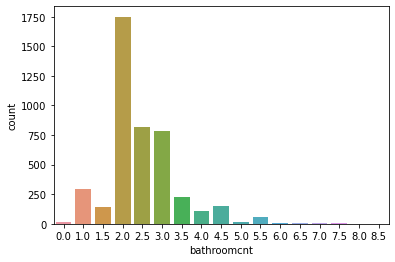

bedroomcnt
4.00    1786
3.00    1730
5.00     465
2.00     322
6.00      52
1.00      18
0.00       5
7.00       4
8.00       1
Name: bedroomcnt, dtype: int64
4.00                  40.75
3.00                  39.47
5.00                  10.61
2.00                   7.35
6.00                   1.19
1.00                   0.41
0.00                   0.11
7.00                   0.09
8.00                   0.02
Name: bedroomcnt, dtype: float64


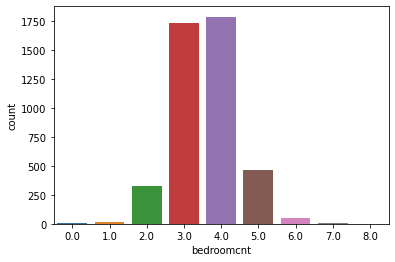

yearbuilt
1,964.00    238
1,962.00    150
1,978.00    143
1,961.00    140
1,965.00    118
           ... 
1,923.00      1
1,918.00      1
1,888.00      1
1,914.00      1
1,880.00      1
Name: yearbuilt, Length: 104, dtype: int64
1,964.00                   5.46
1,962.00                   3.44
1,978.00                   3.28
1,961.00                   3.21
1,965.00                   2.71
                   ...         
1,923.00                   0.02
1,918.00                   0.02
1,888.00                   0.02
1,914.00                   0.02
1,880.00                   0.02
Name: yearbuilt, Length: 104, dtype: float64


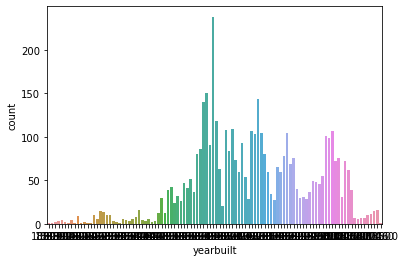

taxvaluedollarcnt
 62,048.00    7
455,000.00    6
700,000.00    6
484,000.00    6
552,000.00    5
             ..
805,112.00    1
709,562.00    1
815,998.00    1
570,000.00    1
 67,205.00    1
Name: taxvaluedollarcnt, Length: 3853, dtype: int64
 62,048.00                   0.16
455,000.00                   0.14
700,000.00                   0.14
484,000.00                   0.14
552,000.00                   0.11
                     ...         
805,112.00                   0.02
709,562.00                   0.02
815,998.00                   0.02
570,000.00                   0.02
 67,205.00                   0.02
Name: taxvaluedollarcnt, Length: 3853, dtype: float64


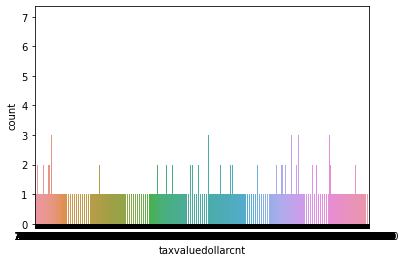

calculatedfinishedsquarefeet
1,205.00    16
1,826.00    15
1,252.00    15
1,226.00    14
1,462.00    13
            ..
4,099.00     1
6,222.00     1
2,850.00     1
3,197.00     1
3,363.00     1
Name: calculatedfinishedsquarefeet, Length: 1941, dtype: int64
1,205.00                   0.37
1,826.00                   0.34
1,252.00                   0.34
1,226.00                   0.32
1,462.00                   0.30
                   ...         
4,099.00                   0.02
6,222.00                   0.02
2,850.00                   0.02
3,197.00                   0.02
3,363.00                   0.02
Name: calculatedfinishedsquarefeet, Length: 1941, dtype: float64


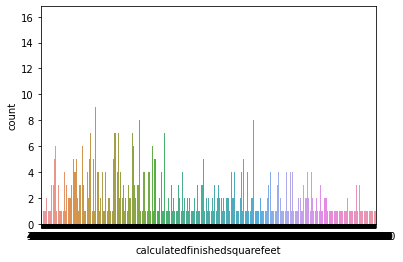

latitude
34,281,197.00    5
34,275,557.00    3
34,229,075.00    3
34,211,295.00    3
34,281,397.00    3
                ..
34,283,260.00    1
34,212,758.00    1
34,212,519.00    1
34,295,276.00    1
34,300,140.00    1
Name: latitude, Length: 4303, dtype: int64
34,281,197.00                   0.11
34,275,557.00                   0.07
34,229,075.00                   0.07
34,211,295.00                   0.07
34,281,397.00                   0.07
                        ...         
34,283,260.00                   0.02
34,212,758.00                   0.02
34,212,519.00                   0.02
34,295,276.00                   0.02
34,300,140.00                   0.02
Name: latitude, Length: 4303, dtype: float64


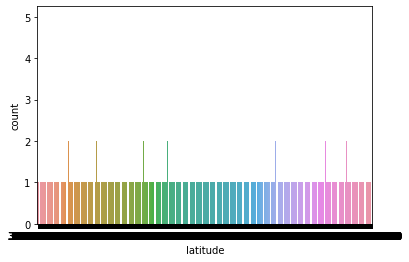

longitude
-119,228,656.00    5
-119,024,723.00    3
-119,027,964.00    3
-119,033,587.00    3
-118,756,259.00    2
                  ..
-118,863,289.00    1
-118,831,577.00    1
-119,205,878.00    1
-118,907,608.00    1
-118,706,327.00    1
Name: longitude, Length: 4325, dtype: int64
-119,228,656.00                   0.11
-119,024,723.00                   0.07
-119,027,964.00                   0.07
-119,033,587.00                   0.07
-118,756,259.00                   0.05
                          ...         
-118,863,289.00                   0.02
-118,831,577.00                   0.02
-119,205,878.00                   0.02
-118,907,608.00                   0.02
-118,706,327.00                   0.02
Name: longitude, Length: 4325, dtype: float64


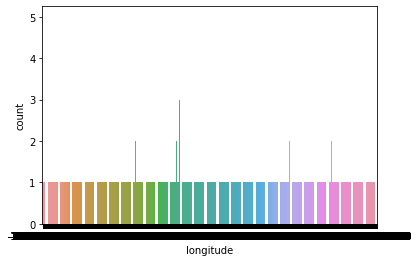

lotsizesquarefeet
 6,000.00    100
 6,500.00     99
 7,000.00     63
 8,000.00     34
 7,500.00     27
            ... 
 5,522.00      1
 5,845.00      1
 5,898.00      1
11,688.00      1
12,105.00      1
Name: lotsizesquarefeet, Length: 2913, dtype: int64
 6,000.00                   2.28
 6,500.00                   2.26
 7,000.00                   1.44
 8,000.00                   0.78
 7,500.00                   0.62
                    ...         
 5,522.00                   0.02
 5,845.00                   0.02
 5,898.00                   0.02
11,688.00                   0.02
12,105.00                   0.02
Name: lotsizesquarefeet, Length: 2913, dtype: float64


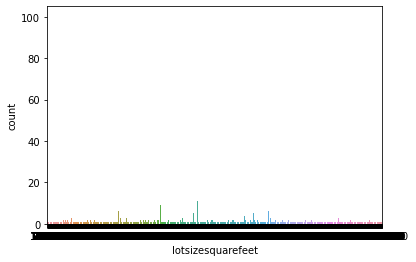

In [31]:
for col in cat_vars:
    print(col)
    print(ventura_df[col].value_counts())
    print(ventura_df[col].value_counts(normalize=True)*100)
    sns.countplot(x=col, data=ventura_df)
    plt.show()

<AxesSubplot:xlabel='logerror'>

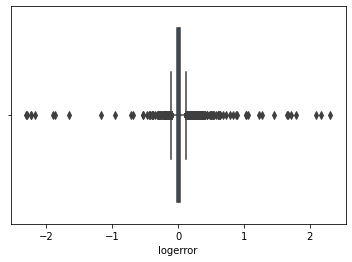

In [32]:
sns.boxplot(x='logerror', data=ventura_df)

<AxesSubplot:>

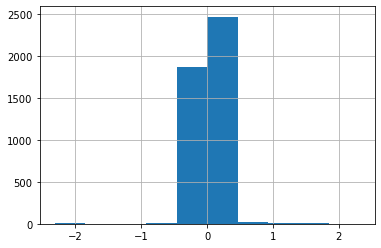

In [33]:
ventura_df.logerror.hist()

bathroomcnt
2.00    4875
2.50    3120
3.00    2567
1.00     897
1.50     694
3.50     693
4.50     536
4.00     379
5.50     165
5.00      71
6.50      41
6.00      27
7.50      11
0.00       8
7.00       8
8.50       2
Name: bathroomcnt, dtype: int64
2.00                  34.59
2.50                  22.14
3.00                  18.21
1.00                   6.36
1.50                   4.92
3.50                   4.92
4.50                   3.80
4.00                   2.69
5.50                   1.17
5.00                   0.50
6.50                   0.29
6.00                   0.19
7.50                   0.08
0.00                   0.06
7.00                   0.06
8.50                   0.01
Name: bathroomcnt, dtype: float64


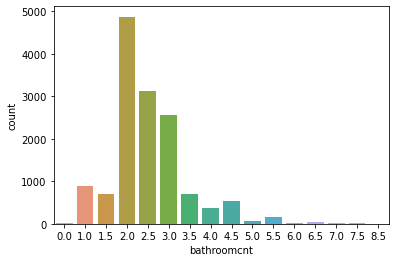

bedroomcnt
3.00    5952
4.00    5017
2.00    1447
5.00    1329
6.00     190
1.00     113
7.00      33
0.00      10
8.00       2
9.00       1
Name: bedroomcnt, dtype: int64
3.00                  42.23
4.00                  35.60
2.00                  10.27
5.00                   9.43
6.00                   1.35
1.00                   0.80
7.00                   0.23
0.00                   0.07
8.00                   0.01
9.00                   0.01
Name: bedroomcnt, dtype: float64


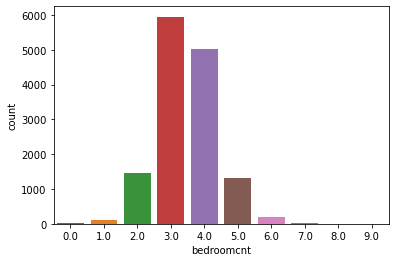

yearbuilt
1,964.00    546
1,955.00    527
1,965.00    491
1,963.00    433
1,973.00    430
           ... 
1,918.00      2
1,902.00      1
1,907.00      1
1,893.00      1
1,895.00      1
Name: yearbuilt, Length: 115, dtype: int64
1,964.00                   3.88
1,955.00                   3.74
1,965.00                   3.49
1,963.00                   3.07
1,973.00                   3.05
                   ...         
1,918.00                   0.01
1,902.00                   0.01
1,907.00                   0.01
1,893.00                   0.01
1,895.00                   0.01
Name: yearbuilt, Length: 115, dtype: float64


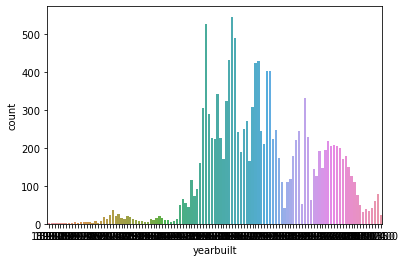

taxvaluedollarcnt
381,640.00    13
569,544.00    12
495,000.00    10
673,097.00     9
455,000.00     9
              ..
790,000.00     1
424,308.00     1
340,415.00     1
514,879.00     1
183,902.00     1
Name: taxvaluedollarcnt, Length: 11295, dtype: int64
381,640.00                   0.09
569,544.00                   0.09
495,000.00                   0.07
673,097.00                   0.06
455,000.00                   0.06
                     ...         
790,000.00                   0.01
424,308.00                   0.01
340,415.00                   0.01
514,879.00                   0.01
183,902.00                   0.01
Name: taxvaluedollarcnt, Length: 11295, dtype: float64


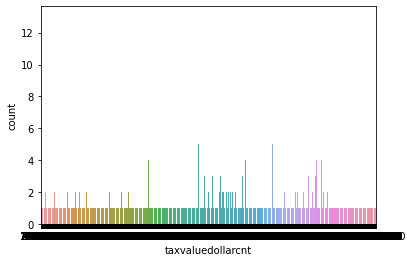

calculatedfinishedsquarefeet
1,472.00    41
1,240.00    34
1,120.00    33
1,232.00    33
1,320.00    32
            ..
5,494.00     1
3,276.00     1
2,409.00     1
  819.00     1
3,740.00     1
Name: calculatedfinishedsquarefeet, Length: 3355, dtype: int64
1,472.00                   0.29
1,240.00                   0.24
1,120.00                   0.23
1,232.00                   0.23
1,320.00                   0.23
                   ...         
5,494.00                   0.01
3,276.00                   0.01
2,409.00                   0.01
  819.00                   0.01
3,740.00                   0.01
Name: calculatedfinishedsquarefeet, Length: 3355, dtype: float64


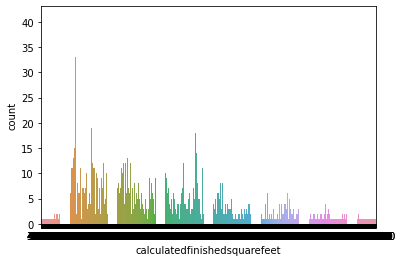

latitude
33,494,800.00    7
33,728,400.00    4
33,588,110.00    4
33,838,600.00    3
33,789,370.00    3
                ..
33,849,075.00    1
33,628,375.00    1
33,815,723.00    1
33,848,005.00    1
33,450,438.00    1
Name: latitude, Length: 13782, dtype: int64
33,494,800.00                   0.05
33,728,400.00                   0.03
33,588,110.00                   0.03
33,838,600.00                   0.02
33,789,370.00                   0.02
                        ...         
33,849,075.00                   0.01
33,628,375.00                   0.01
33,815,723.00                   0.01
33,848,005.00                   0.01
33,450,438.00                   0.01
Name: latitude, Length: 13782, dtype: float64


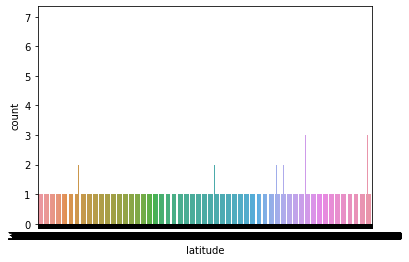

longitude
-117,835,000.00    8
-117,830,000.00    7
-117,670,000.00    7
-117,853,000.00    5
-117,847,000.00    5
                  ..
-117,609,025.00    1
-117,746,035.00    1
-118,020,389.00    1
-117,951,878.00    1
-117,874,125.00    1
Name: longitude, Length: 13718, dtype: int64
-117,835,000.00                   0.06
-117,830,000.00                   0.05
-117,670,000.00                   0.05
-117,853,000.00                   0.04
-117,847,000.00                   0.04
                          ...         
-117,609,025.00                   0.01
-117,746,035.00                   0.01
-118,020,389.00                   0.01
-117,951,878.00                   0.01
-117,874,125.00                   0.01
Name: longitude, Length: 13718, dtype: float64


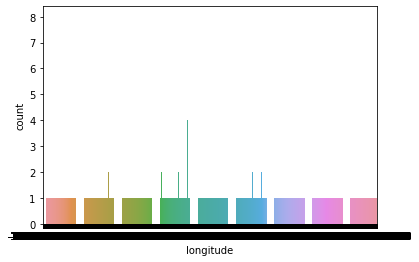

lotsizesquarefeet
 6,000.00    686
 7,200.00    266
 5,000.00    249
 7,000.00    178
 6,600.00    119
            ... 
 9,894.00      1
 4,568.00      1
 7,966.00      1
34,412.00      1
20,090.00      1
Name: lotsizesquarefeet, Length: 4692, dtype: int64
 6,000.00                   4.88
 7,200.00                   1.89
 5,000.00                   1.77
 7,000.00                   1.27
 6,600.00                   0.85
                    ...         
 9,894.00                   0.01
 4,568.00                   0.01
 7,966.00                   0.01
34,412.00                   0.01
20,090.00                   0.01
Name: lotsizesquarefeet, Length: 4692, dtype: float64


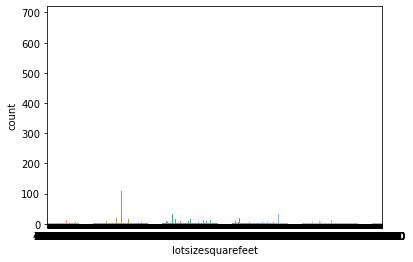

In [34]:
for col in cat_vars:
    print(col)
    print(orange_df[col].value_counts())
    print(orange_df[col].value_counts(normalize=True)*100)
    sns.countplot(x=col, data=orange_df)
    plt.show()

<AxesSubplot:xlabel='logerror'>

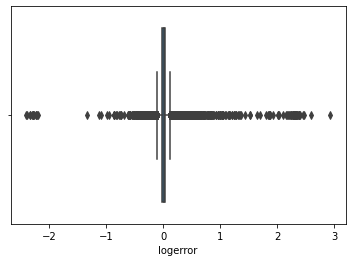

In [35]:
sns.boxplot(x='logerror', data=orange_df)

<AxesSubplot:>

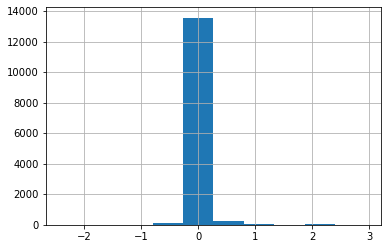

In [36]:
orange_df.logerror.hist()

bathroomcnt
 2.00    15268
 1.00     8375
 3.00     7324
 4.00     1737
 5.00      718
 6.00      289
 7.00       76
 8.00       52
 0.00       37
 9.00       13
10.00        5
11.00        3
18.00        1
13.00        1
Name: bathroomcnt, dtype: int64
 2.00                  45.04
 1.00                  24.71
 3.00                  21.61
 4.00                   5.12
 5.00                   2.12
 6.00                   0.85
 7.00                   0.22
 8.00                   0.15
 0.00                   0.11
 9.00                   0.04
10.00                   0.01
11.00                   0.01
18.00                   0.00
13.00                   0.00
Name: bathroomcnt, dtype: float64


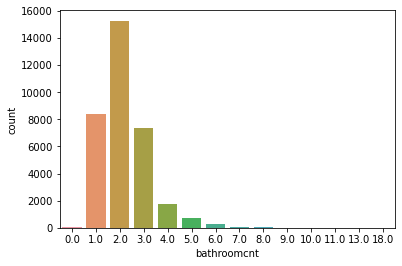

bedroomcnt
 3.00    15677
 4.00     8437
 2.00     6570
 5.00     2179
 1.00      481
 6.00      393
 7.00       69
 0.00       58
 8.00       21
 9.00        7
12.00        3
10.00        2
14.00        1
11.00        1
Name: bedroomcnt, dtype: int64
 3.00                  46.25
 4.00                  24.89
 2.00                  19.38
 5.00                   6.43
 1.00                   1.42
 6.00                   1.16
 7.00                   0.20
 0.00                   0.17
 8.00                   0.06
 9.00                   0.02
12.00                   0.01
10.00                   0.01
14.00                   0.00
11.00                   0.00
Name: bedroomcnt, dtype: float64


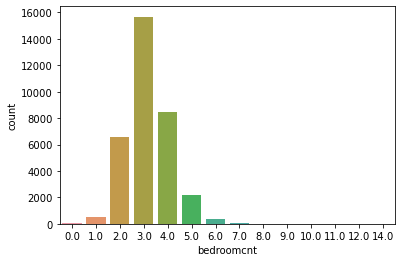

yearbuilt
1,950.00    1454
1,955.00    1325
1,953.00    1292
1,954.00    1188
1,952.00    1085
            ... 
1,897.00       1
1,892.00       1
1,878.00       1
1,882.00       1
1,894.00       1
Name: yearbuilt, Length: 132, dtype: int64
1,950.00                   4.29
1,955.00                   3.91
1,953.00                   3.81
1,954.00                   3.51
1,952.00                   3.20
                   ...         
1,897.00                   0.00
1,892.00                   0.00
1,878.00                   0.00
1,882.00                   0.00
1,894.00                   0.00
Name: yearbuilt, Length: 132, dtype: float64


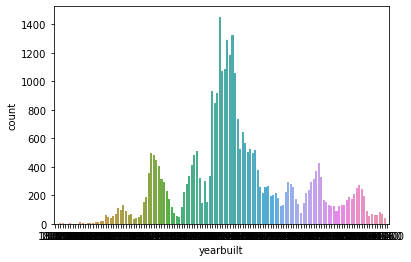

taxvaluedollarcnt
  600,000.00    20
  455,000.00    19
  450,000.00    19
  520,000.00    17
  550,000.00    16
                ..
  125,664.00     1
1,023,742.00     1
   56,912.00     1
   30,605.00     1
   49,546.00     1
Name: taxvaluedollarcnt, Length: 25820, dtype: int64
  600,000.00                   0.06
  455,000.00                   0.06
  450,000.00                   0.06
  520,000.00                   0.05
  550,000.00                   0.05
                       ...         
  125,664.00                   0.00
1,023,742.00                   0.00
   56,912.00                   0.00
   30,605.00                   0.00
   49,546.00                   0.00
Name: taxvaluedollarcnt, Length: 25820, dtype: float64


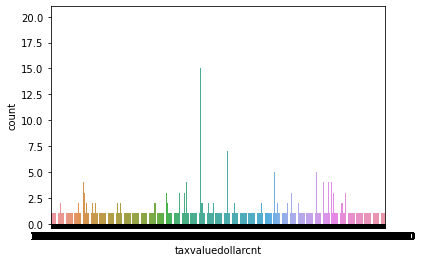

calculatedfinishedsquarefeet
1,200.00    87
1,120.00    86
1,080.00    86
  936.00    71
1,570.00    70
            ..
4,325.00     1
3,285.00     1
9,518.00     1
5,775.00     1
2,596.00     1
Name: calculatedfinishedsquarefeet, Length: 4132, dtype: int64
1,200.00                   0.26
1,120.00                   0.25
1,080.00                   0.25
  936.00                   0.21
1,570.00                   0.21
                   ...         
4,325.00                   0.00
3,285.00                   0.00
9,518.00                   0.00
5,775.00                   0.00
2,596.00                   0.00
Name: calculatedfinishedsquarefeet, Length: 4132, dtype: float64


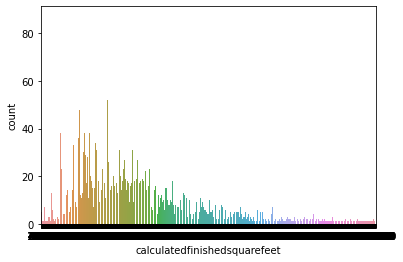

latitude
34,047,500.00    12
34,101,300.00     7
34,487,900.00     7
34,137,792.00     6
34,041,200.00     6
                 ..
34,016,304.00     1
33,867,220.00     1
33,938,757.00     1
34,080,947.00     1
33,937,685.00     1
Name: latitude, Length: 32734, dtype: int64
34,047,500.00                   0.04
34,101,300.00                   0.02
34,487,900.00                   0.02
34,137,792.00                   0.02
34,041,200.00                   0.02
                        ...         
34,016,304.00                   0.00
33,867,220.00                   0.00
33,938,757.00                   0.00
34,080,947.00                   0.00
33,937,685.00                   0.00
Name: latitude, Length: 32734, dtype: float64


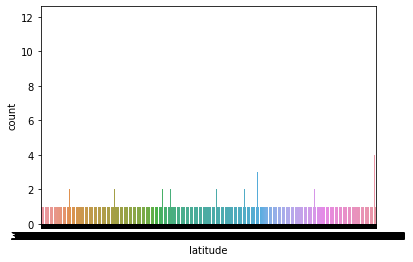

longitude
-118,249,000.00    12
-118,172,000.00     7
-118,327,000.00     7
-117,894,004.00     6
-118,251,000.00     6
                   ..
-118,282,940.00     1
-118,264,199.00     1
-118,444,449.00     1
-118,384,030.00     1
-117,996,709.00     1
Name: longitude, Length: 32860, dtype: int64
-118,249,000.00                   0.04
-118,172,000.00                   0.02
-118,327,000.00                   0.02
-117,894,004.00                   0.02
-118,251,000.00                   0.02
                          ...         
-118,282,940.00                   0.00
-118,264,199.00                   0.00
-118,444,449.00                   0.00
-118,384,030.00                   0.00
-117,996,709.00                   0.00
Name: longitude, Length: 32860, dtype: float64


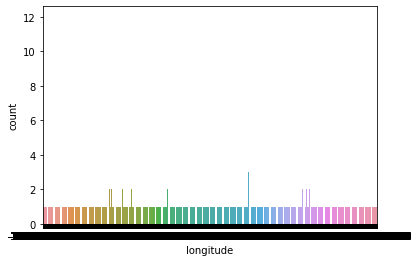

lotsizesquarefeet
  5,000.00    147
  6,000.00     90
  7,499.00     90
  7,500.00     84
  5,999.00     79
             ... 
  2,527.00      1
126,718.00      1
  3,820.00      1
 15,897.00      1
 47,405.00      1
Name: lotsizesquarefeet, Length: 11964, dtype: int64
  5,000.00                   0.44
  6,000.00                   0.27
  7,499.00                   0.27
  7,500.00                   0.25
  5,999.00                   0.24
                     ...         
  2,527.00                   0.00
126,718.00                   0.00
  3,820.00                   0.00
 15,897.00                   0.00
 47,405.00                   0.00
Name: lotsizesquarefeet, Length: 11964, dtype: float64


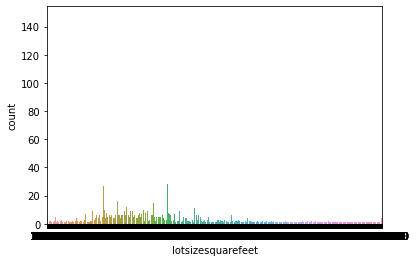

In [38]:
for col in cat_vars:
    print(col)
    print(los_angeles_df[col].value_counts())
    print(los_angeles_df[col].value_counts(normalize=True)*100)
    sns.countplot(x=col, data=los_angeles_df)
    plt.show()

<AxesSubplot:xlabel='logerror'>

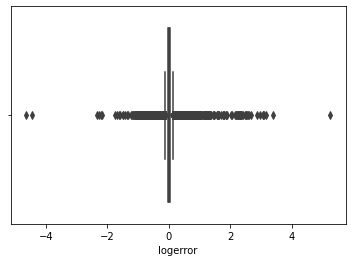

In [39]:
sns.boxplot(x='logerror', data=los_angeles_df)

<AxesSubplot:>

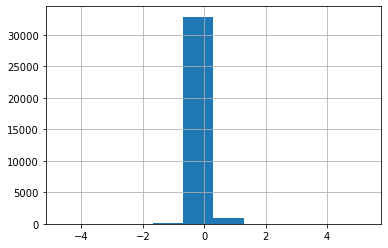

In [40]:
los_angeles_df.logerror.hist()